### Poin-poin Assignment
1. Gunakan dataset berikut : (pilih salah satu dataset)
 - diabetes.csv -> column target : Outcome
 - dataset_1.csv -> column target :  target
 - fraud.csv -> column target : Fraud_Decoded
2. Ikuti instruksi pada poin-poin assignments
3. Drive dataset and files assignment : https://drive.google.com/drive/folders/1V82xaUF3XskNtApo0V9fcQoJt2W2n6Jh?usp=sharing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

#tambahkan library yang dibutuhkan

In [ ]:
# Pilih dataset yang digunakan (salah satu saja, sisanya bisa untuk latihan)

df = pd.read_csv("1701241482273-diabetes (1).csv") #contoh
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Assignment 1 Poin (20)
1. Lakukan proses EDA pada data kategorikal dan numerikal, sesimple melihat distribusi atau statistical summary saja.
2. Lakukan proses Feature Engineering : drop duplikat, % missing value checking, missing value handling, Handling Outliers, feature scalling, Encoding. Notes : must be splitting before feature engineering.

#### EDA

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
508,2,84,50,23,76,30.4,0.968,21,0
198,4,109,64,44,99,34.8,0.905,26,1
283,7,161,86,0,0,30.4,0.165,47,1
591,2,112,78,50,140,39.4,0.175,24,0
463,5,88,78,30,0,27.6,0.258,37,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Pregnancies =================


1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


============= Glucose =================


99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64


============= BloodPressure =================


70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64


============= SkinThickness =================


0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64


============= Insulin =================


0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64


============= BMI =================


32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64


============= DiabetesPedigreeFunction =================


0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64


============= Age =================


22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


============= Outcome =================


0    500
1    268
Name: Outcome, dtype: int64

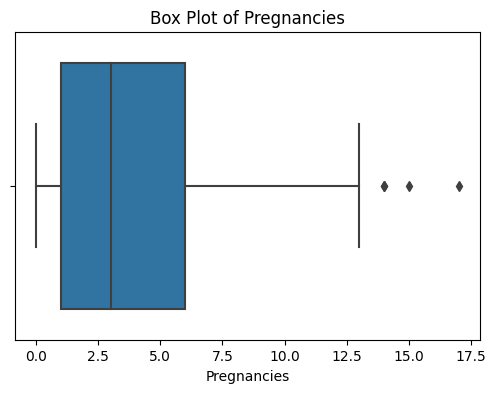

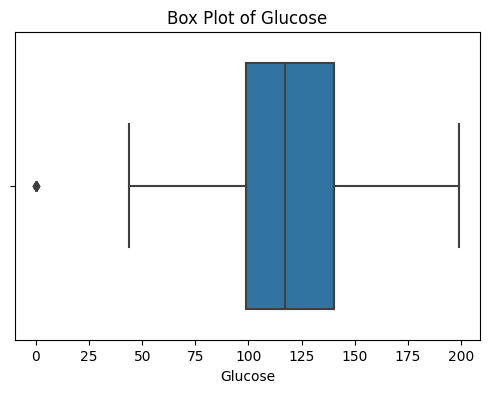

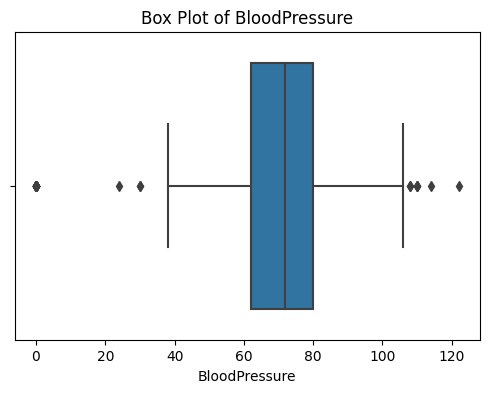

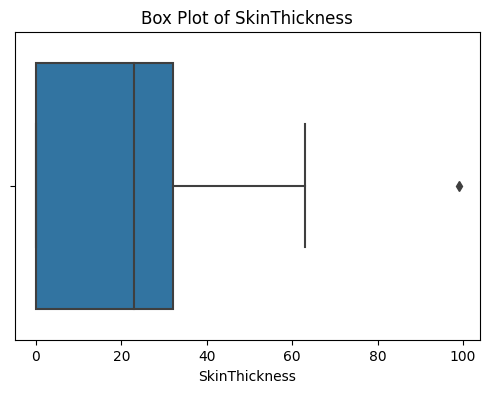

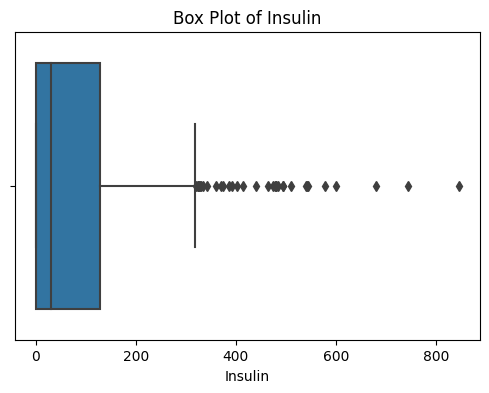

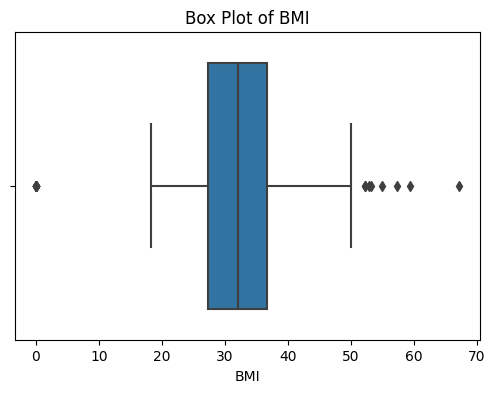

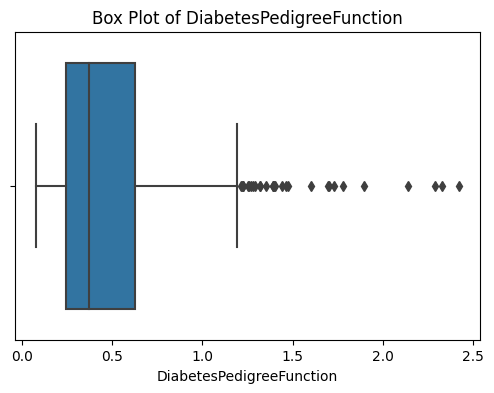

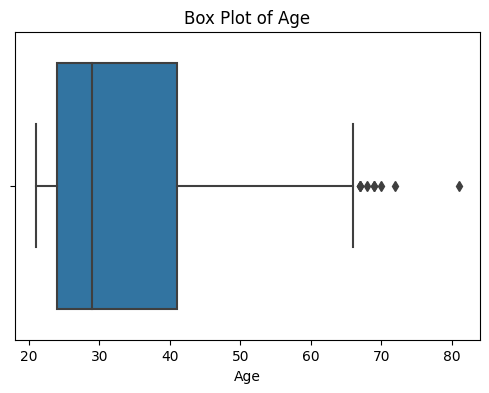

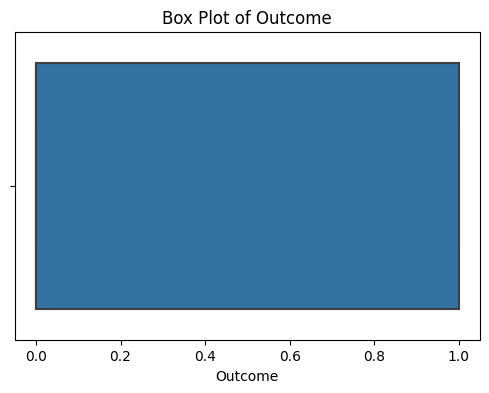

In [ ]:
for feature in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

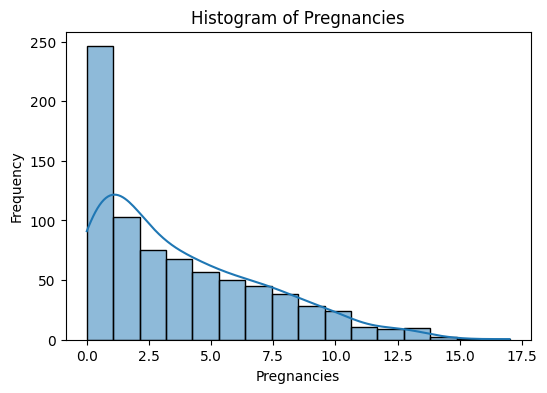

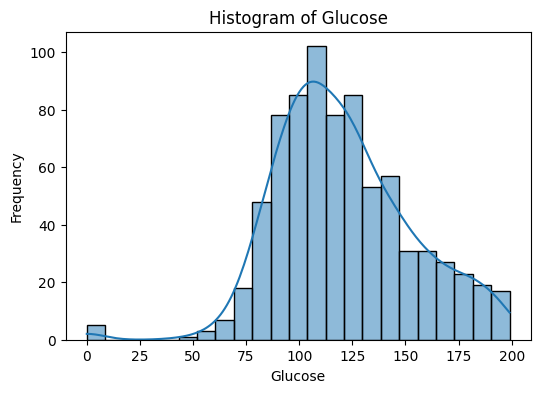

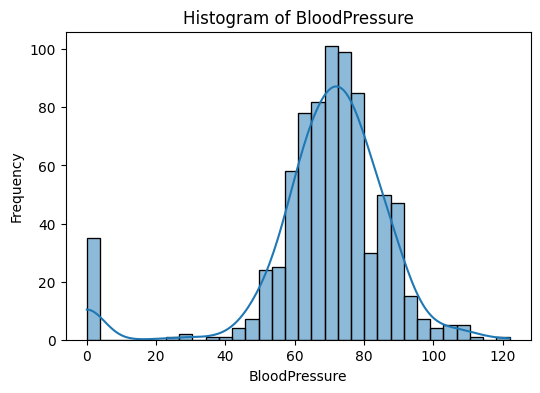

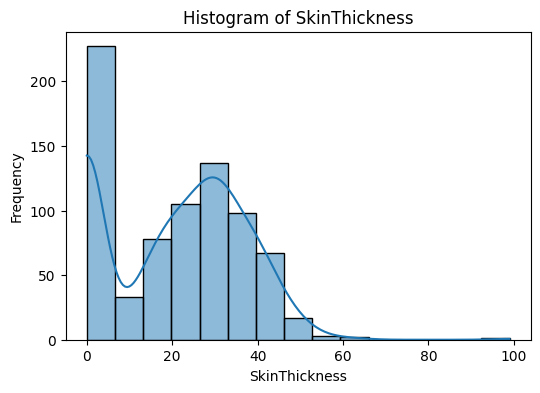

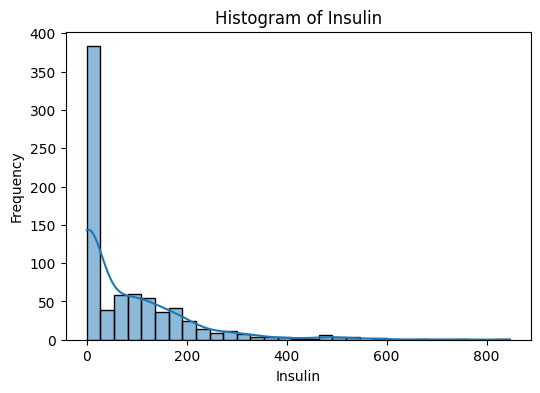

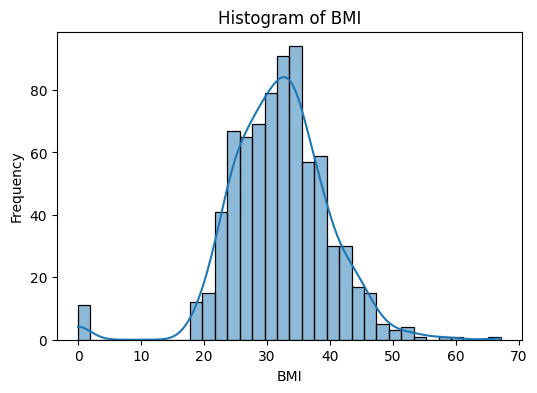

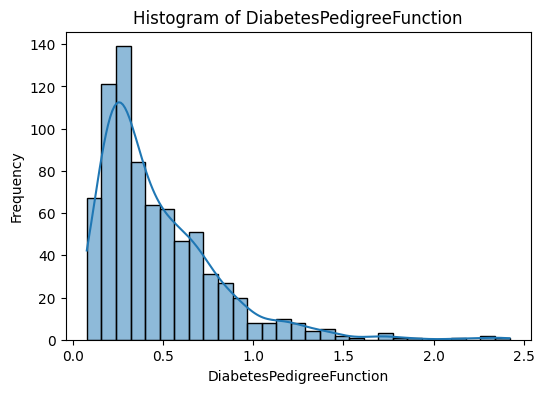

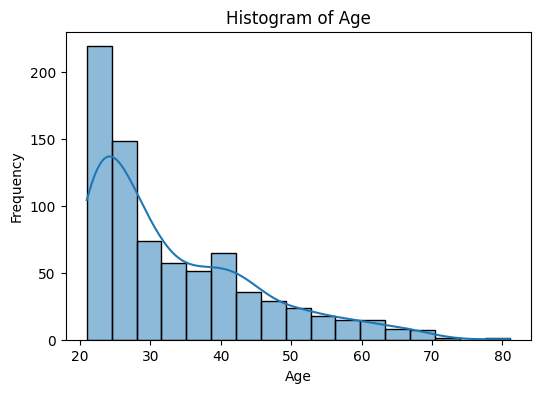

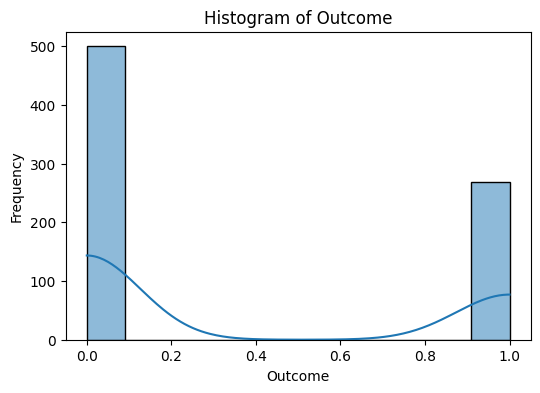

In [ ]:
for feature in df:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Dilakukan EDA pada data dengan mengecek distribusi serta informasi statistiknya, terlihat bahwa distribusi data ada yang mendekati normal dimana puncak cenderung di tengah, ada juga yang distribusi dengan condong ke samping baik kiri, lalu terlihat juga bahwa data memiliki nilai outlier didalamnya, sedangkan pada informasi statistik terlihat bahwa data memiliki fitur numerik secara keseluruhan lalu terlihat bahwa tidak ada nilai yang diluar konteks seperti negatif pada data.

#### Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
def drop_duplicates(data):

    print("Before drop duplicated data")
    print(data.shape)

    data = data.drop_duplicates(keep='first')

    print("After drop duplicated data")
    print(data.shape)

    # Check again for duplicated data
    print("Duplicated data:")
    print(data[data.duplicated(keep=False)])

    return data

In [ ]:
train = drop_duplicates(train)
test = drop_duplicates(test)

Before drop duplicated data
(614, 9)
After drop duplicated data
(614, 9)
Duplicated data:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Before drop duplicated data
(154, 9)
After drop duplicated data
(154, 9)
Duplicated data:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [ ]:
def display_isna_values(train, test):

  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_isna_values(train, test)

Missing values in train data:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing values in test data:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
def display_null_values(train, test):

  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_null_values(train, test)

Missing values in train data:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing values in test data:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
def display_isin_values(train, test, isin):

  print("Missing values in train data:\n")
  print(train.isin([isin]).sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isin([isin]).sum())

display_isin_values(train, test, '?')

Missing values in train data:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Missing values in test data:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df[df['Outcome'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


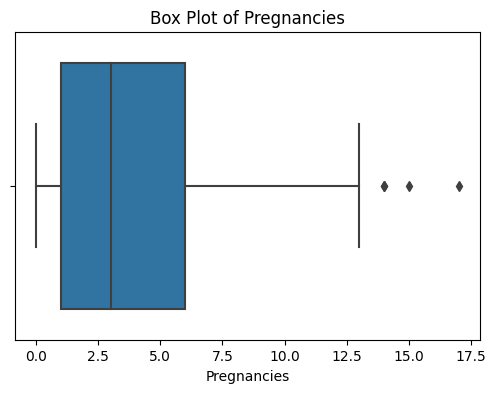

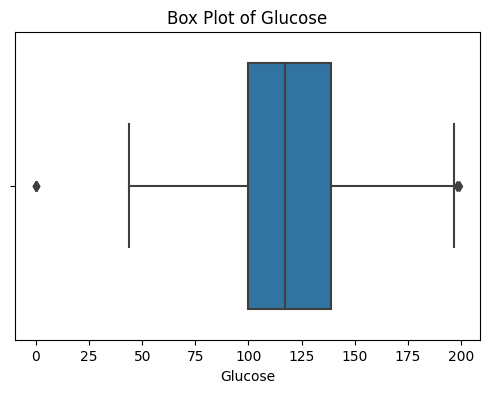

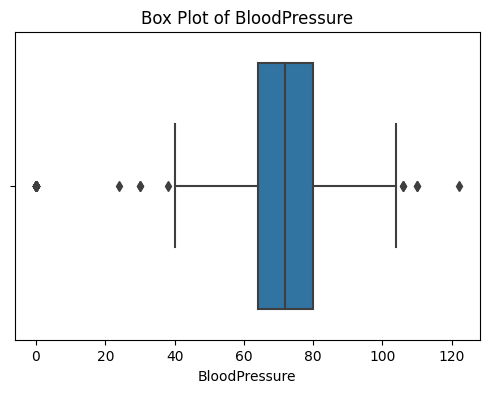

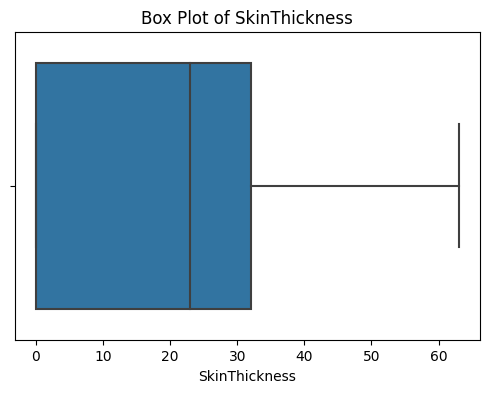

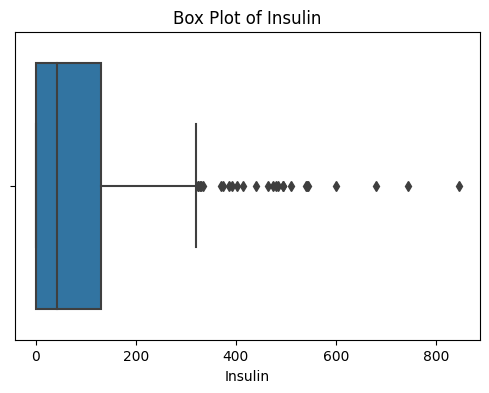

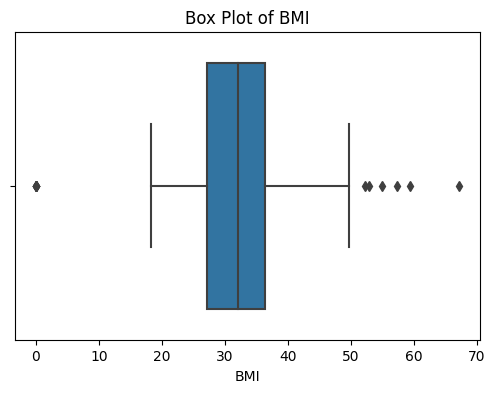

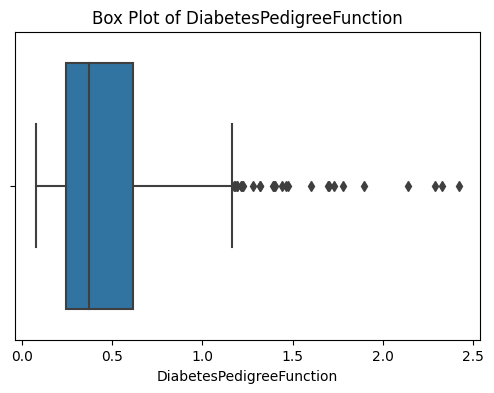

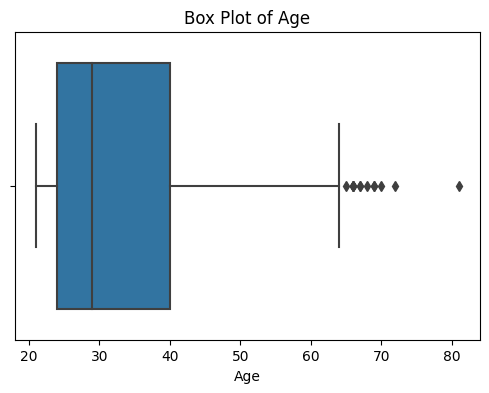

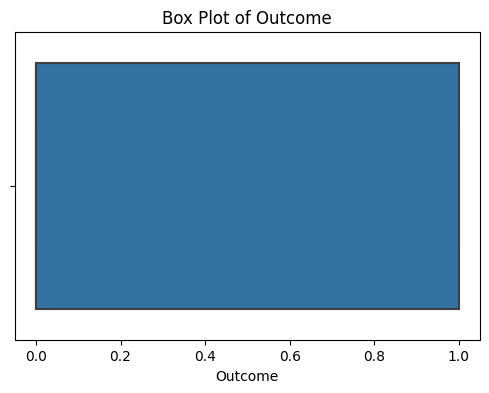

In [ ]:
for feature in train:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

def handle_outliers(df, variable, upper_limit, lower_limit):

    df[variable] = np.where(df[variable] > upper_limit, upper_limit,
                            np.where(df[variable] < lower_limit, lower_limit, df[variable]))


In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in columns:
  upper_limit, lower_limit = find_outlier_boundary(train, col)
  print(f'Upper and lower limits for {col}: {upper_limit}, {lower_limit}')
  handle_outliers(train, col, upper_limit, lower_limit)
  print(f'Data after handling outliers for {col}:')
  print(train[col].head())

Upper and lower limits for Pregnancies: 13.5, -6.5
Data after handling outliers for Pregnancies:
60     2.0
618    9.0
346    1.0
294    0.0
231    6.0
Name: Pregnancies, dtype: float64
Upper and lower limits for Glucose: 197.5, 41.5
Data after handling outliers for Glucose:
60      84.0
618    112.0
346    139.0
294    161.0
231    134.0
Name: Glucose, dtype: float64
Upper and lower limits for BloodPressure: 104.0, 40.0
Data after handling outliers for BloodPressure:
60     40.0
618    82.0
346    46.0
294    50.0
231    80.0
Name: BloodPressure, dtype: float64
Upper and lower limits for Insulin: 324.375, -194.625
Data after handling outliers for Insulin:
60       0.000
618      0.000
346     83.000
294      0.000
231    324.375
Name: Insulin, dtype: float64
Upper and lower limits for BMI: 50.287499999999994, 13.187500000000004
Data after handling outliers for BMI:
60     13.1875
618    28.2000
346    28.7000
294    21.9000
231    46.2000
Name: BMI, dtype: float64
Upper and lower limi

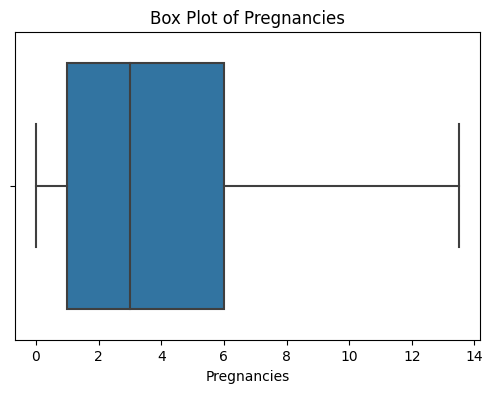

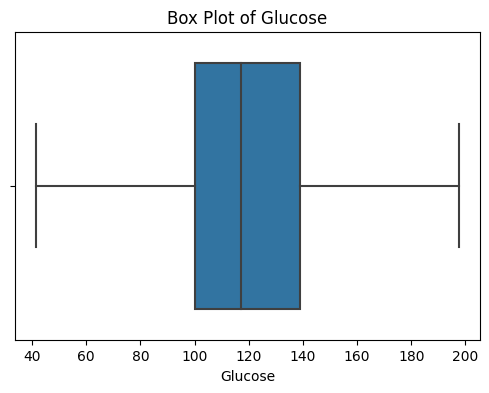

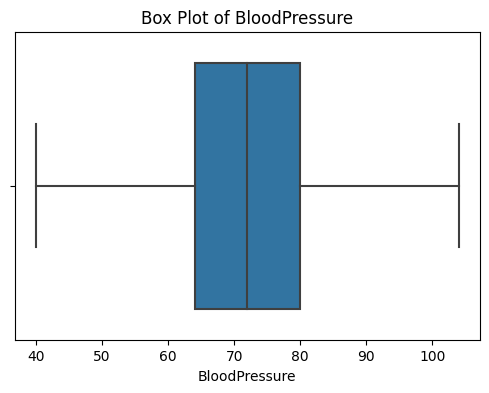

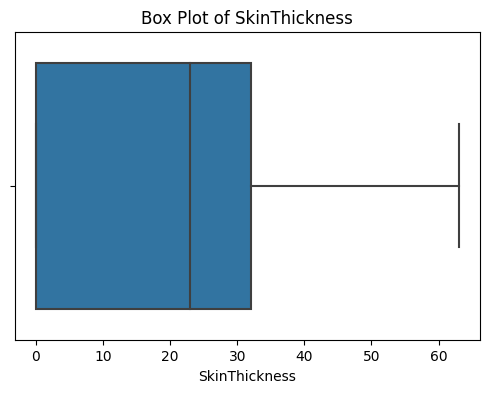

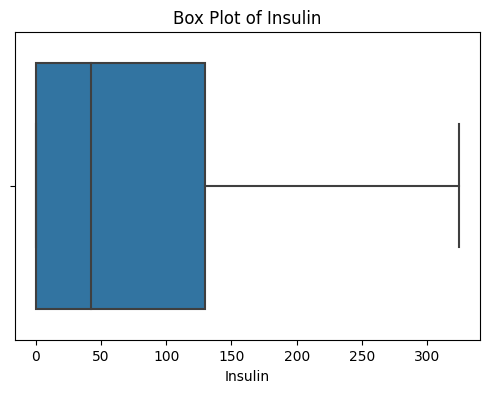

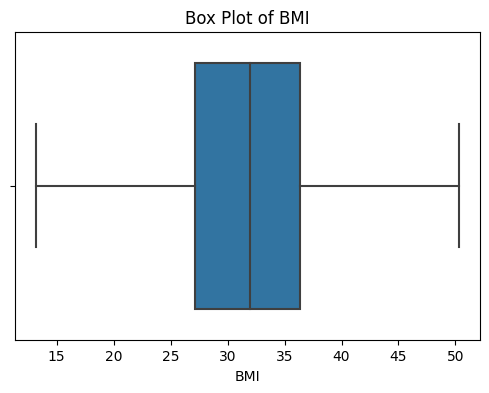

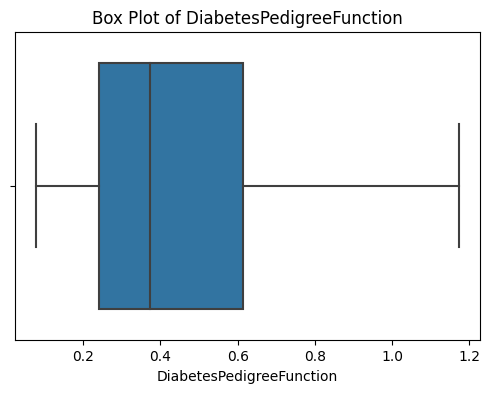

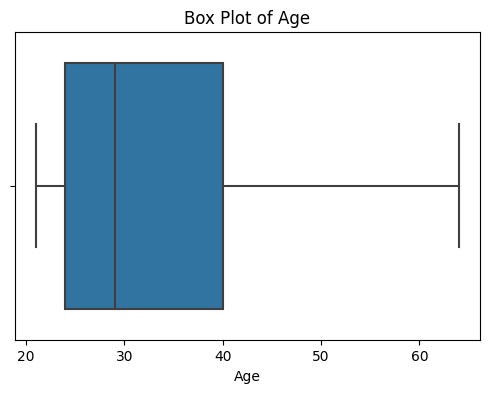

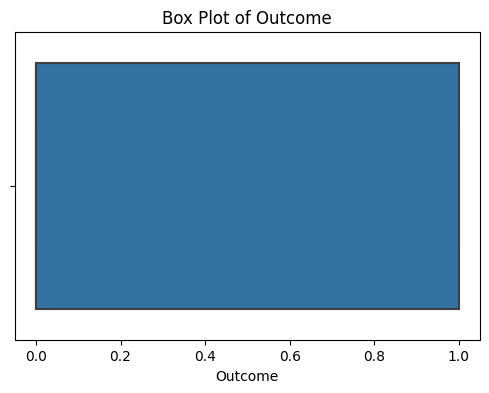

In [ ]:
for feature in train:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.732899,121.189739,70.985342,20.399023,75.098941,32.064882,0.452914,32.809446,0.346906
std,3.280571,30.949273,13.288300,15.433974,93.393431,7.000592,0.279506,11.199708,0.476373
min,0.000000,41.500000,40.000000,0.000000,0.000000,13.187500,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,13.500000,197.500000,104.000000,63.000000,324.375000,50.287500,1.172125,64.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_features(train, test, target_column):

    scaler = StandardScaler()

    train_features = scaler.fit_transform(train.drop(target_column, axis=1))
    train_scaled = pd.DataFrame(train_features, columns=train.columns[:-1])

    test_features = scaler.transform(test.drop(target_column, axis=1))
    test_scaled = pd.DataFrame(test_features, columns=test.columns[:-1])

    return train_scaled, test_scaled

train_scaled, test_scaled = scale_features(train, test, 'Outcome')

In [ ]:
train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.528662,-1.202615,-2.333677,-1.322774,-0.804769,-2.698739,-0.533211,-1.055302
1,1.606853,-0.297171,0.829575,0.233505,-0.804769,-0.552529,2.575250,1.536162
2,-0.833735,0.575935,-1.881784,-0.090720,0.084669,-0.481049,0.720020,-0.965941
3,-1.138809,1.287356,-1.580522,-1.322774,-0.804769,-1.453187,-0.712244,2.787214
4,0.691632,0.414249,0.678944,1.076490,2.671272,2.020778,-0.769534,1.178719


In [ ]:
test_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.691632,-0.749893,-0.977998,0.817110,1.231294,0.276647,-0.082048,0.910636
1,-0.528662,-0.297171,0.302366,0.752265,-0.804769,0.519682,-1.091794,-1.055302
2,-0.528662,-0.426520,-0.526105,-1.322774,-0.804769,-0.180829,-1.055987,-1.055302
3,1.301780,-0.458858,0.678944,-1.322774,-0.804769,-1.067191,1.443314,0.106389
4,0.996706,0.478924,1.432099,-1.322774,-0.804769,-0.309495,-0.869793,1.536162


In [ ]:
X_train = train_scaled
y_train = train['Outcome']
X_test = test_scaled
y_test = test['Outcome']

Dilakukan feature engineering dengan melakukan split terlebih dahulu, lalu dilakukan cek untuk duplikat dan missing value yang ternyata tidak ada sehingga dilanjutkan pada handling outlier dimana dilakukan handling dengan IQR, lalu dilakukan scaling dengan standard scaler, tidak dilakukan encoding karena data sudah berupa numerik semua.

### Assignment 2 (poin 10):
1. Buatlah evaluation scoring suatu model untuk kasus klasifikasi (pilih salah satu saja, misal accuracy, recall, precision, F1-Score, ROC-AUC) berikan alasannya dalam memilih evaluation scoring tersebut.
2. Buatlah learning curve function dan pilih cara evaluation scoring apa yang ingin dicapai.

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    # Evaluation on the training data
    y_train_pred = classifier.predict(X_train)
    recall_train = recall_score(y_train, y_train_pred)
    print(f'Training Recall: {recall_train}')

    # Evaluation on the testing data
    y_test_pred = classifier.predict(X_test)
    recall_test = recall_score(y_test, y_test_pred)
    print(f'Test Recall: {recall_test}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

Dibuat fungsi evaluasi dengan recall karena recall mengukur sebeapa baik model dapat mengidentifikasi kasus positif yang sebenarnya, yaitu pasien diabetes, jadi dengan recall, dapat diketahui seberapa banyak pasien yang terdeteksi diabetes dari semua pasian yang benar benar memiliki diabetes, hal ini agar tidak melewatkan pasien yang berisiko tinggi atau membutuhkan perawatan segera

### Assignment 3 A. (Poin 45):
1. lakukan proses Bagging, Boosting, Stacking
2. Bagging menggunakan model BaggingClassifier dengan base_estimator merupakan model_classifier selain Decision Tree karena sudah dipraktikan di kelas.
3. Boosting bisa menggunakan Adaptive boosting, XGBoost, Light GBM, CatBoost (pilih salah 1 model saja). Jangan memakai GradientBoostingClassifier karena sudah digunakan di kelas.
4. Lakukan stacking dengan pemilihan kombinasi model estimator (level 1 model), dan juga 1 model untuk final_estimator (level 2 model)

### Assignment 3 B. (Poin 25) :
1. Lakukan optuna pada BaggingClassifier yang dipilih model pada poin 3A dan juga pada Boosting, lalu pilih best parameter model dan re-fit ke data xtrain, ytrain.
2. Pilih parameter model yang sesuai dengan model yang digunakan pada Bagging dan Boosting yang dipilih saudara (pilih minimal 3 parameter model)
3. Lakukan evaluasi Model dan learning curve untuk mengecek performa model apakah underfitting, overfitting, atau optimal ?

## Notes perintah pada poin 3A dan 3B ada yang berbeda dari Assignment Day 16

In [ ]:
#Tambahkan cell jika dibutuhkan

#### Bagging

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ex_model = ExtraTreesClassifier()
ex_model.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
print("EXt Classifier:")
evaluate_model(ex_model, X_train, y_train, X_test, y_test)

EXt Classifier:
Training Recall: 1.0
Test Recall: 0.6545454545454545


Learning Curve for Extratree Classifier


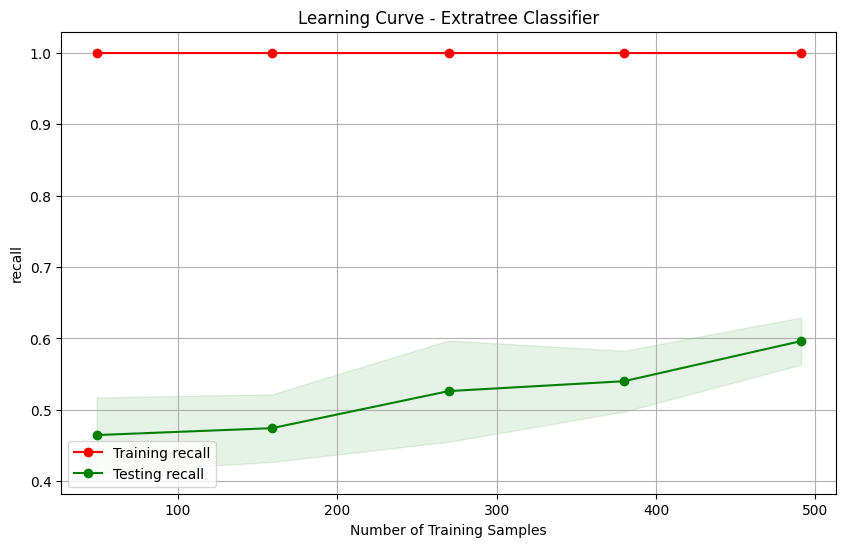

In [ ]:
# Loop untuk model di atas
models = [
    ("Extratree Classifier", ex_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Pada hasil bagging dengan extra tree classifier diatas didapatkan hasil recall 1.0 untuk train dan 0.65 untuk test, dengan learning curvenya untuk train stabil
sedangkan testing cenderung terdapat kenaikan namun nilainya adalah 0.6, yaitu gap nya 0.4 dengan train, dapat ditarik kesimpulan bahwa model mengalami overfit di mana model terlalu baik dalam mempelajari data training, tetapi tidak mampu memprediksi data testing dengan baik1. Hal ini dapat dilihat dari nilai recall yang sangat tinggi untuk data training (1), tetapi sangat rendah untuk data testing (0.65). Selain itu, learning curve juga menunjukkan bahwa ada gap yang besar antara performa model untuk data training dan data testing (0.4), yang menandakan bahwa model tidak generalisasi dengan baik

#### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
# Bagging Classifier with Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=SVC(), random_state=42)
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=42)

In [ ]:
print("Bagging Classifier SVM:")
evaluate_model(bagging_model, X_train, y_train, X_test, y_test)

Bagging Classifier SVM:
Training Recall: 0.6338028169014085
Test Recall: 0.509090909090909


Learning Curve for Bagging Classifier SVM


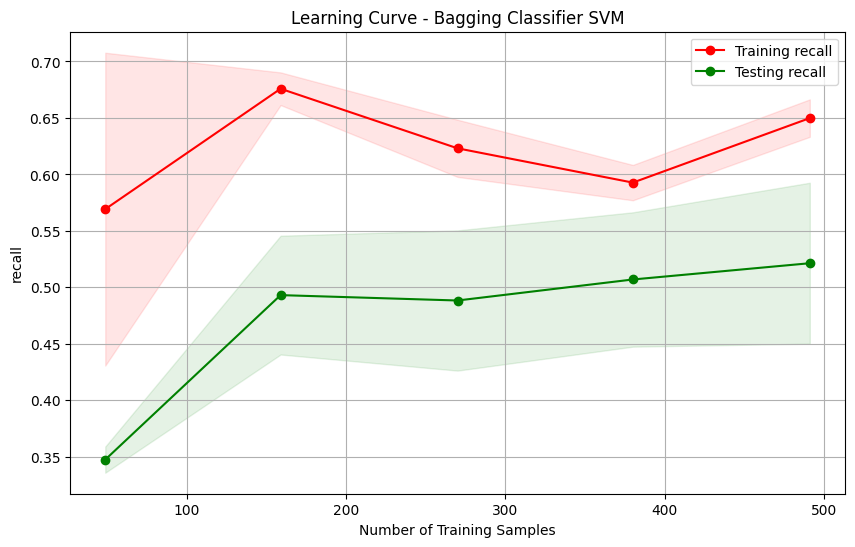

In [ ]:
models = [
    ("Bagging Classifier SVM", bagging_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Dari hasil bagging classifier dengan svm, didapatkan hasil recall untuk train 0.633, dan testing 0.5, serta pada learning curve untuk train dia naik turun walau diakhir terdapat kecenderungan naik, lalu pada testing ia cenderung naik, dapat ditarik kesimpulan bahwa model ada kemungkinan untuk cenderung mengalami underfit, di mana model tidak dapat mempelajari data training dengan baik, sehingga tidak mampu memprediksi data testing dengan baik. Hal ini dapat dilihat dari nilai recall yang rendah untuk data training (0.633) dan data test 0.5,

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00


#### Bagging tuning

In [ ]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 150)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])

    clf = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    ex_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = ex_model.predict(X_test)

    # Evaluate the model using Recall
    recall = recall_score(y_test, y_test_pred)

    return recall

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-12-12 13:14:34,336] A new study created in memory with name: no-name-28f0c52c-f0bc-4476-bc01-4ef36ccae8df
[I 2023-12-12 13:14:34,530] Trial 0 finished with value: 0.6363636363636364 and parameters: {'n_estimators': 44, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto'}. Best is trial 0 with value: 0.6363636363636364.
[I 2023-12-12 13:14:34,723] Trial 1 finished with value: 0.6363636363636364 and parameters: {'n_estimators': 41, 'max_depth': 9, 'min_samples_split': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.6363636363636364.
[I 2023-12-12 13:14:34,963] Trial 2 finished with value: 0.6545454545454545 and parameters: {'n_estimators': 74, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_features': 'auto'}. Best is trial 2 with value: 0.6545454545454545.
[I 2023-12-12 13:14:35,236] Trial 3 finished with value: 0.6545454545454545 and parameters: {'n_estimators': 16, 'max_depth': 2, 'min_s

Number of finished trials: 100
Best trial: {'n_estimators': 102, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}


In [ ]:
best_params = study.best_params
best_score = study.best_value

In [ ]:
final_ex_model = ExtraTreesClassifier(**best_params)
final_ex_model.fit(X_train, y_train)

# Evaluate the final model
print("Optimized EX Classifier:")
evaluate_model(final_ex_model, X_train, y_train, X_test, y_test)

Optimized EX Classifier:
Training Recall: 0.7887323943661971
Test Recall: 0.6363636363636364


Learning Curve for Ex Classifier After Optuna Tunning


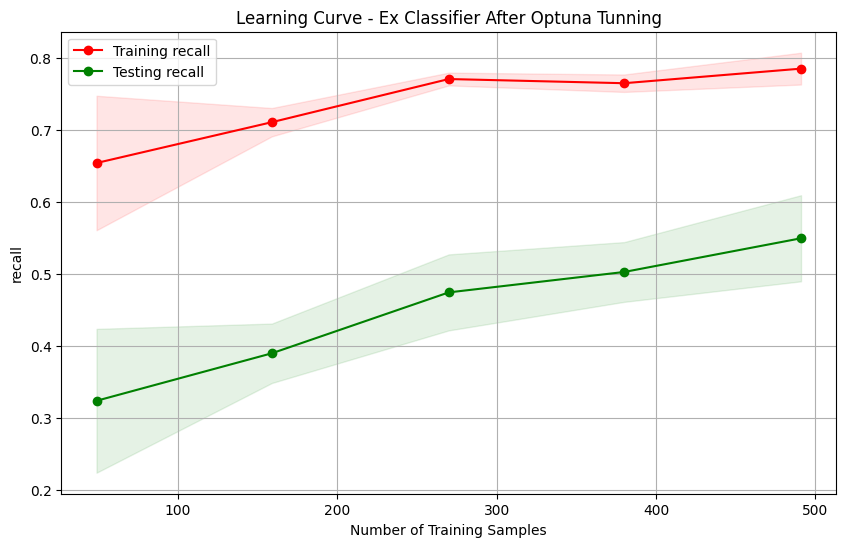

In [ ]:
models = [
    ("Ex Classifier After Optuna Tunning", final_ex_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Dari hasil bagging extra tree classifier yang sudah dituning tersebut didapat hasil recal train 0.788, dan test 0.636, lalu pada learning curve keduanya cenderung mengalami kenaikan, dapat ditarik kesimpulan bahwa model sudah memiliki performa yang cukup baik, namun dapat ditingkatkan. Hal ini dapat dilihat dari nilai recall yang menunjukkan bahwa model dapat mengidentifikasi sekitar 79% kasus positif pada data training dan sekitar 64% kasus positif pada data testing

#### Bagging classifier tuning

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_samples = trial.suggest_float('max_samples', 0.1, 1.0)
    max_features = trial.suggest_float('max_features', 0.1, 1.0)

    # Create a BaggingClassifier with the suggested hyperparameters
    model = BaggingClassifier(
        base_estimator=SVC(),
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    recall = recall_score(y_test, y_test_pred)
    return recall

In [ ]:
study = optuna.create_study(direction='maximize')  # maximize

# Optimize the study, optimizing the objective function
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params
best_params

[I 2023-12-12 13:15:03,022] A new study created in memory with name: no-name-a9b55580-60c0-4632-8f66-1c466c9c4088
[I 2023-12-12 13:15:04,071] Trial 0 finished with value: 0.5272727272727272 and parameters: {'n_estimators': 146, 'max_samples': 0.251924913421992, 'max_features': 0.9154190926510084}. Best is trial 0 with value: 0.5272727272727272.
[I 2023-12-12 13:15:04,643] Trial 1 finished with value: 0.41818181818181815 and parameters: {'n_estimators': 94, 'max_samples': 0.16373206998589404, 'max_features': 0.8549174053560745}. Best is trial 0 with value: 0.5272727272727272.
[I 2023-12-12 13:15:04,799] Trial 2 finished with value: 0.4909090909090909 and parameters: {'n_estimators': 10, 'max_samples': 0.9462171076035976, 'max_features': 0.6390589666940477}. Best is trial 0 with value: 0.5272727272727272.
[I 2023-12-12 13:15:07,241] Trial 3 finished with value: 0.5636363636363636 and parameters: {'n_estimators': 165, 'max_samples': 0.9318049400361569, 'max_features': 0.7050861242464804}.

{'n_estimators': 134,
 'max_samples': 0.42392282383880187,
 'max_features': 0.8732054494247639}

In [ ]:
best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Recall: {best_score}")

Best Parameters: {'n_estimators': 134, 'max_samples': 0.42392282383880187, 'max_features': 0.8732054494247639}
Recall: 0.6


In [ ]:
final_bag_model = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=best_params['n_estimators'],
    max_samples=best_params['max_samples'],
    max_features=best_params['max_features'],
    random_state=42
)
final_bag_model.fit(X_train, y_train)

# Evaluate the final model
print("Optimized bag Classifier:")
evaluate_model(final_bag_model, X_train, y_train, X_test, y_test)

Optimized bag Classifier:
Training Recall: 0.5727699530516432
Test Recall: 0.6


Learning Curve for Final Bag Classifier


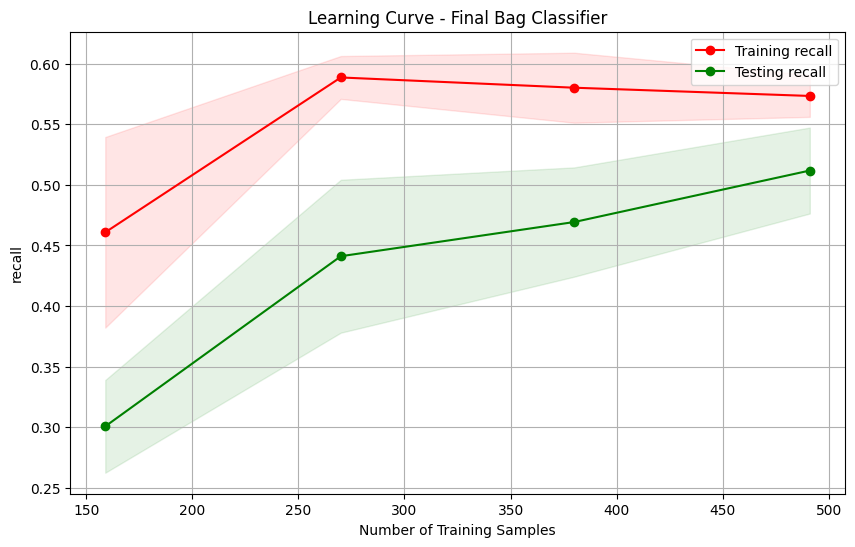

In [ ]:
models = [
    ("Final Bag Classifier", final_bag_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Pada bgging classifier dengan svm yang sudah dituning didapat hasil recal train 0.57 dan test 0.6, dan pada learning curvenya untuk train dia naik namun pada akhir cenderung turun, sedangkan untuk test ia naik. dapat ditarik kesimpulan bahwa model masih kurang baik dimana walaupun gapnya kecil namun performanya masih kurang.

#### Boosting

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)

print("CatBoost Classifier:")
evaluate_model(cat_model, X_train, y_train, X_test, y_test)

Learning rate set to 0.008365
0:	learn: 0.6883994	total: 49ms	remaining: 48.9s
1:	learn: 0.6848445	total: 50.6ms	remaining: 25.3s
2:	learn: 0.6811176	total: 52.5ms	remaining: 17.5s
3:	learn: 0.6768890	total: 54.4ms	remaining: 13.6s
4:	learn: 0.6733538	total: 56.5ms	remaining: 11.2s
5:	learn: 0.6692800	total: 58.6ms	remaining: 9.71s
6:	learn: 0.6651393	total: 60.5ms	remaining: 8.58s
7:	learn: 0.6613177	total: 62.4ms	remaining: 7.74s
8:	learn: 0.6579628	total: 64.4ms	remaining: 7.09s
9:	learn: 0.6553368	total: 65.6ms	remaining: 6.5s
10:	learn: 0.6512334	total: 67.5ms	remaining: 6.07s
11:	learn: 0.6484617	total: 69.4ms	remaining: 5.71s
12:	learn: 0.6452546	total: 71.2ms	remaining: 5.41s
13:	learn: 0.6417480	total: 73.1ms	remaining: 5.15s
14:	learn: 0.6387055	total: 75.1ms	remaining: 4.93s
15:	learn: 0.6346955	total: 77ms	remaining: 4.74s
16:	learn: 0.6309034	total: 79.2ms	remaining: 4.58s
17:	learn: 0.6274002	total: 81.1ms	remaining: 4.42s
18:	learn: 0.6246090	total: 83ms	remaining: 4.29s

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6864850	total: 11.5ms	remaining: 2.3s
5:	learn: 0.6850630	total: 12.7ms	remaining: 2.11s
6:	learn: 0.6833370	total: 13.9ms	remaining: 1.97s
7:	learn: 0.6814281	total: 14.9ms	remaining: 1.85s
8:	learn: 0.6798155	total: 15.9ms	remaining: 1.75s
9:	learn: 0.6785008	total: 16.8ms	remaining: 1.67s
10:	learn: 0.6772302	total: 19.6ms	remaining: 1.76s
11:	learn: 0.6757494	total: 20.8ms	remaining: 1.71s
12:	learn: 0.6743135	total: 22ms	remaining: 1.67s
13:	learn: 0.6723785	total: 24.1ms	remaining: 1.7s
14:	learn: 0.6710709	total: 26.5ms	remaining: 1.74s
15:	learn: 0.6692331	total: 28.5ms	remaining: 1.75s
16:	learn: 0.6683047	total: 30.6ms	remaining: 1.77s
17:	learn: 0.6664457	total: 33.5ms	remaining: 1.83s
18:	learn: 0.6651060	total: 34.8ms	remaining: 1.8s
19:	learn: 0.6634439	total: 37ms	remaining: 1.81s
20:	learn: 0.6617165	total: 39.9ms	remaining: 1.86s
21:	learn: 0.6601841	total: 41.3ms	remaining: 1.84s
22:	learn: 0.6586459	total

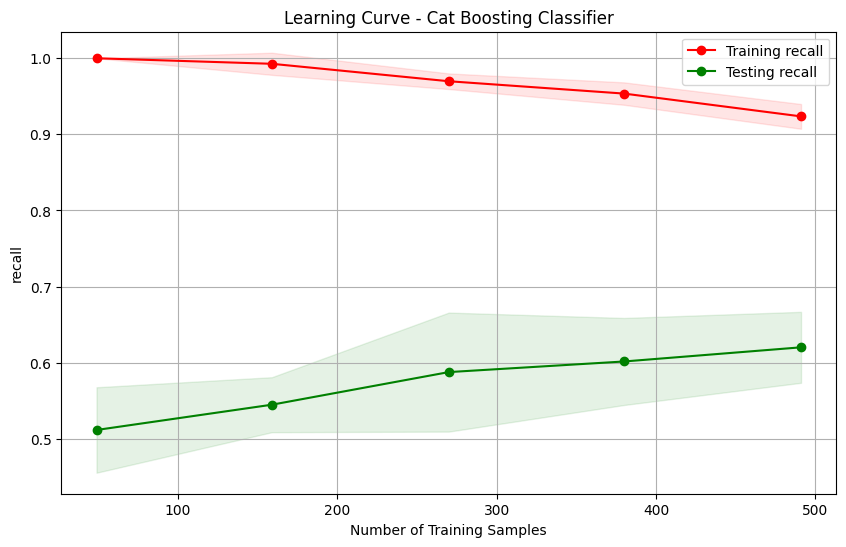

In [ ]:
models = [
    ("Cat Boosting Classifier", cat_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Pada catboost diatas didapat hasil recall train 0.89 pada data train dan 0.67 pada test, serta pada learning curve train cenderung turun dengan test yang naik, dapat ditarik kesimpulan bahwa model memiliki indikasi untuk overfit dimana didapat recal tinggi pada train namun masih kurang untuk test dengan gap yang cukup jauh.

#### Boosting tuning

In [ ]:
def objective(trial):
    # Define the hyperparameters to be optimized
    iterations = trial.suggest_int('iterations', 50, 300)
    depth = trial.suggest_int('depth', 4, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    random_strength = trial.suggest_int('random_strength', 0, 100)
    bagging_temperature = trial.suggest_loguniform('bagging_temperature', 0.01, 100.00)
    od_type = trial.suggest_categorical('od_type', ['IncToDec', 'Iter'])
    od_wait = trial.suggest_int('od_wait', 10, 50)

    # Create a CatBoostClassifier with the suggested hyperparameters
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        random_strength=random_strength,
        bagging_temperature=bagging_temperature,
        od_type=od_type,
        od_wait=od_wait,
        random_state=42  # Set a random state for reproducibility
    )

    model.fit(X_train, y_train, verbose=False)
    y_test_pred = model.predict(X_test)
    recall = recall_score(y_test, y_test_pred)

    return recall

In [ ]:
study = optuna.create_study(direction='maximize')  # maximize

# Optimize the study, optimizing the objective function
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params
best_params

[I 2023-12-12 13:18:09,189] A new study created in memory with name: no-name-dee4d36f-f58a-46c6-b8e9-02778026f2e8
[I 2023-12-12 13:18:09,299] Trial 0 finished with value: 0.509090909090909 and parameters: {'iterations': 53, 'depth': 5, 'learning_rate': 0.03450115047154048, 'random_strength': 23, 'bagging_temperature': 46.85078232650175, 'od_type': 'Iter', 'od_wait': 48}. Best is trial 0 with value: 0.509090909090909.
[I 2023-12-12 13:18:09,535] Trial 1 finished with value: 0.6181818181818182 and parameters: {'iterations': 158, 'depth': 5, 'learning_rate': 0.03596665026668091, 'random_strength': 42, 'bagging_temperature': 1.9138546445491416, 'od_type': 'Iter', 'od_wait': 47}. Best is trial 1 with value: 0.6181818181818182.
[I 2023-12-12 13:18:09,673] Trial 2 finished with value: 0.4 and parameters: {'iterations': 80, 'depth': 4, 'learning_rate': 0.020009012325497018, 'random_strength': 64, 'bagging_temperature': 0.018305341879197544, 'od_type': 'Iter', 'od_wait': 29}. Best is trial 1 wi

{'iterations': 245,
 'depth': 9,
 'learning_rate': 0.05409820201045071,
 'random_strength': 93,
 'bagging_temperature': 78.86155779381036,
 'od_type': 'Iter',
 'od_wait': 46}

In [ ]:
best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Recall: {best_score}")

Best Parameters: {'iterations': 245, 'depth': 9, 'learning_rate': 0.05409820201045071, 'random_strength': 93, 'bagging_temperature': 78.86155779381036, 'od_type': 'Iter', 'od_wait': 46}
Recall: 0.7272727272727273


In [ ]:
final_cat_model = CatBoostClassifier(**best_params)
final_cat_model.fit(X_train, y_train)

# Evaluate the final model
print("Optimized cat Boosting Classifier:")
evaluate_model(final_cat_model, X_train, y_train, X_test, y_test)

0:	learn: 0.6768941	total: 10.5ms	remaining: 2.57s
1:	learn: 0.6559180	total: 21.9ms	remaining: 2.66s
2:	learn: 0.6362652	total: 28.2ms	remaining: 2.28s
3:	learn: 0.6169766	total: 35.4ms	remaining: 2.13s
4:	learn: 0.6051602	total: 41.4ms	remaining: 1.98s
5:	learn: 0.5936204	total: 47.5ms	remaining: 1.89s
6:	learn: 0.5787563	total: 54.3ms	remaining: 1.84s
7:	learn: 0.5643844	total: 63.8ms	remaining: 1.89s
8:	learn: 0.5456990	total: 70.4ms	remaining: 1.84s
9:	learn: 0.5381962	total: 76.9ms	remaining: 1.81s
10:	learn: 0.5280984	total: 83ms	remaining: 1.76s
11:	learn: 0.5208318	total: 89.5ms	remaining: 1.74s
12:	learn: 0.5132228	total: 95.9ms	remaining: 1.71s
13:	learn: 0.5083257	total: 97.5ms	remaining: 1.61s
14:	learn: 0.5005497	total: 104ms	remaining: 1.59s
15:	learn: 0.4906025	total: 110ms	remaining: 1.57s
16:	learn: 0.4842996	total: 116ms	remaining: 1.55s
17:	learn: 0.4792230	total: 122ms	remaining: 1.54s
18:	learn: 0.4742738	total: 128ms	remaining: 1.52s
19:	learn: 0.4648179	total: 1

Streaming output truncated to the last 5000 lines.
145:	learn: 0.1747210	total: 972ms	remaining: 659ms
146:	learn: 0.1733668	total: 978ms	remaining: 652ms
147:	learn: 0.1728091	total: 985ms	remaining: 645ms
148:	learn: 0.1719633	total: 994ms	remaining: 640ms
149:	learn: 0.1707778	total: 1s	remaining: 633ms
150:	learn: 0.1690195	total: 1.01s	remaining: 627ms
151:	learn: 0.1679242	total: 1.01s	remaining: 620ms
152:	learn: 0.1671326	total: 1.02s	remaining: 613ms
153:	learn: 0.1657093	total: 1.03s	remaining: 610ms
154:	learn: 0.1650846	total: 1.04s	remaining: 604ms
155:	learn: 0.1637150	total: 1.05s	remaining: 598ms
156:	learn: 0.1629422	total: 1.05s	remaining: 592ms
157:	learn: 0.1618046	total: 1.06s	remaining: 585ms
158:	learn: 0.1615005	total: 1.07s	remaining: 578ms
159:	learn: 0.1609353	total: 1.07s	remaining: 571ms
160:	learn: 0.1598644	total: 1.08s	remaining: 564ms
161:	learn: 0.1586158	total: 1.09s	remaining: 557ms
162:	learn: 0.1576312	total: 1.09s	remaining: 550ms
163:	learn: 0.15

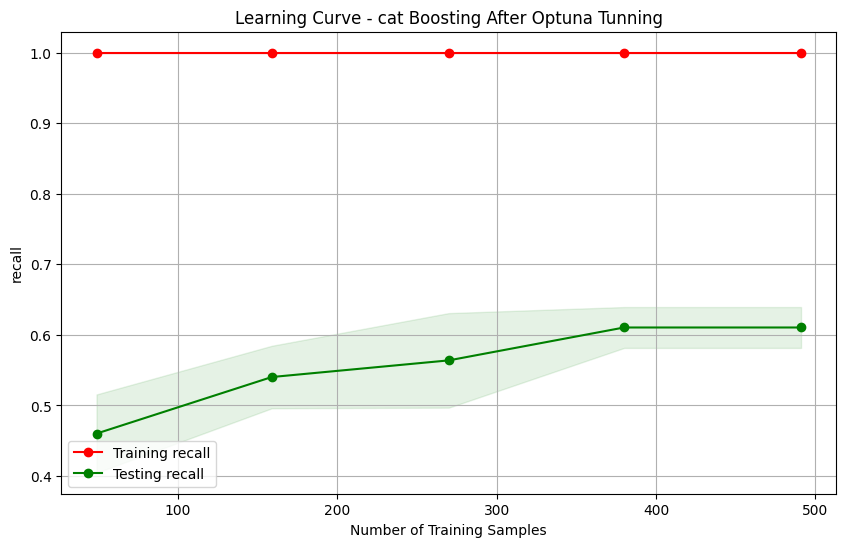

In [ ]:
models = [
    ("cat Boosting After Optuna Tunning", final_cat_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Dari hasil tuning didapat recall untuk train 1, sedangkan test 0.65, terlihat bahwa model masih mengalami overfit dimana hasil terlalu tinggi pada train sedangkan untuk test kurang.

#### Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Fungsi untuk melatih dan mengevaluasi model dengan default parameters
def algorithm_pipeline_default(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = recall_score(y_test, y_pred)
    return [model, y_pred, score]


# Definisi model regresi untuk dilatih dengan default parameters
models_to_train_clf_default = [
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

models_preds_scores_clf_default = []

# Melatih dan mengevaluasi model classification dengan default parameters
for model in models_to_train_clf_default:
    result_clf_default = algorithm_pipeline_default(X_train, X_test, y_train, y_test, model)
    models_preds_scores_clf_default.append(result_clf_default)

# Evaluasi setiap model regresi
for result in models_preds_scores_clf_default:
    model_name = type(result[0]).__name__
    print(f'\nModel: {model_name}')
    evaluate_model(result[0], X_train, y_train, X_test, y_test)


Model: GradientBoostingClassifier
Training Recall: 0.8685446009389671
Test Recall: 0.6727272727272727

Model: RandomForestClassifier
Training Recall: 1.0
Test Recall: 0.6727272727272727

Model: XGBClassifier
Training Recall: 1.0
Test Recall: 0.6545454545454545


In [ ]:
#Numerical Model
from sklearn.linear_model import LogisticRegression
# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC  # Import SVM
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # Import KNN
from lightgbm import LGBMClassifier

# define the base models -> Complex Model
level1 = list()
level1.append(('Cat boost', CatBoostClassifier()))
level1.append(('XGBoost', XGBClassifier()))
level1.append(('LGBM', LGBMClassifier()))

level2 = SVC()

# define the stacking ensemble
model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
539:	learn: 0.2764939	total: 1.17s	remaining: 1s
540:	learn: 0.2761673	total: 1.18s	remaining: 998ms
541:	learn: 0.2759166	total: 1.18s	remaining: 996ms
542:	learn: 0.2756181	total: 1.18s	remaining: 993ms
543:	learn: 0.2754302	total: 1.18s	remaining: 991ms
544:	learn: 0.2751276	total: 1.18s	remaining: 988ms
545:	learn: 0.2746873	total: 1.19s	remaining: 986ms
546:	learn: 0.2745035	total: 1.19s	remaining: 984ms
547:	learn: 0.2742867	total: 1.19s	remaining: 981ms
548:	learn: 0.2740426	total: 1.19s	remaining: 981ms
549:	learn: 0.2736667	total: 1.2s	remaining: 978ms
550:	learn: 0.2734711	total: 1.2s	remaining: 976ms
551:	learn: 0.2731896	total: 1.2s	remaining: 974ms
552:	learn: 0.2729892	total: 1.2s	remaining: 971ms
553:	learn: 0.2727919	total: 1.2s	remaining: 969ms
554:	learn: 0.2724176	total: 1.21s	remaining: 966ms
555:	learn: 0.2721831	total: 1.21s	remaining: 964ms
556:	learn: 0.2720220	total: 1.21s	remaining: 961ms
557:	learn: 0.2719279

StackingClassifier(cv=5,
                   estimators=[('Cat boost',
                                <catboost.core.CatBoostClassifier object at 0x7a268340cc70>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=No...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('LGBM', LGBMClassifier())],
                   final_estimator=SVC())

In [ ]:
print("Stacking Classifier:")
evaluate_model(model, X_train, y_train, X_test, y_test)

Stacking Classifier:
Training Recall: 0.9953051643192489
Test Recall: 0.6727272727272727


Streaming output truncated to the last 5000 lines.
539:	learn: 0.2659983	total: 1.06s	remaining: 907ms
540:	learn: 0.2657439	total: 1.07s	remaining: 904ms
541:	learn: 0.2655917	total: 1.07s	remaining: 902ms
542:	learn: 0.2653121	total: 1.07s	remaining: 900ms
543:	learn: 0.2651053	total: 1.07s	remaining: 898ms
544:	learn: 0.2647730	total: 1.07s	remaining: 896ms
545:	learn: 0.2644278	total: 1.07s	remaining: 894ms
546:	learn: 0.2642442	total: 1.08s	remaining: 894ms
547:	learn: 0.2640244	total: 1.08s	remaining: 895ms
548:	learn: 0.2637000	total: 1.09s	remaining: 895ms
549:	learn: 0.2634118	total: 1.09s	remaining: 893ms
550:	learn: 0.2631729	total: 1.1s	remaining: 894ms
551:	learn: 0.2629596	total: 1.1s	remaining: 893ms
552:	learn: 0.2627299	total: 1.1s	remaining: 892ms
553:	learn: 0.2624596	total: 1.11s	remaining: 892ms
554:	learn: 0.2622852	total: 1.11s	remaining: 890ms
555:	learn: 0.2619208	total: 1.11s	remaining: 889ms
556:	learn: 0.2616341	total: 1.11s	remaining: 886ms
557:	learn: 0.26

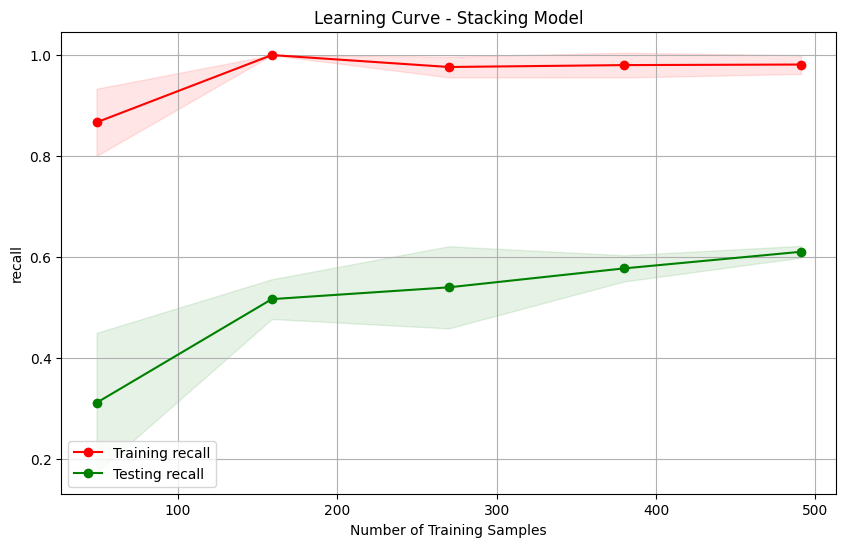

In [ ]:
models = [
    ("Stacking Model", model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve_classification(model, X_train, y_train, cv=5, scoring='recall', title=f"Learning Curve - {model_name}")

Dari model stacking diatas terlihat bahwa hasil juga masih mengalami overfit dimana recal untuk train 0.99 dan test 0.67, model dapat mengenail data train dengan baik namunn tidak untuk test. jadi kesimpulannya dari sekian model yang dicoba, adalah model bagging extra tree mendapat hasil terbaik dan cukup optimal.